# **2.1 Unsupervised Learning Algorithms Reduced**

# Clustering Weather Data with Unsupervised Learning

This project applies hierarchical clustering methods to decades of ClimateWins temperature data to uncover natural groupings among weather stations and variables. By comparing different linkage approaches and scaling choices, the aim is to reveal patterns and associations that may highlight how weather has shifted over the past 60 years and whether these clusters align with ClimateWins’ definition of “pleasant weather.

## Table of Contents
- [1. Import Libraries](#1-import-libraries)  
- [2. Load Data](#2-load-data)
- [3. Clustering with Dendrograms](#3-clustering-with-dendrograms)
  - Single Linkage
  - Complete Linkage
  - Average Linkage
  - Ward Method

---

## 1. Import Libraries

Here’s where I load the Python packages I’ll need:

- `pandas` and `numpy` for managing and transforming data
- `seaborn` and `matplotlib` (plus ticker and figure) for creating clear, customisable visualisations
- `os` and `operator` for handling file paths and supporting utility functions
- `sklearn.preprocessing.StandardScaler` for scaling features before clustering
- `sklearn.decomposition.PCA` for dimensionality reduction and exploring variance in the data
- `scipy.cluster.hierarchy` tools (linkage, dendrogram, fcluster) for performing hierarchical clustering and generating dendrograms

Together, these libraries provide everything needed to prepare the data, scale it, run clustering algorithms, and visualize the resulting patterns.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from matplotlib.pyplot import figure
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

---

## 2. Load Data

In this step, I set the file path and loaded two datasets into pandas: the full scaled European weather dataset and a PCA-reduced version from 2010. Checking the shape confirmed the data imported correctly, and having both versions on hand allows for comparisons between the raw and dimensionally reduced data in later clustering steps.

In [2]:
# Create a path to where my data is stored
path = r'/Users/yaseminmustafa/Desktop/CareerFoundry/Specialisation'

In [3]:
# Read in the European weather data
climate = pd.read_csv(os.path.join(path, 'Achievement 1', '1.2', '[DATASET]_scaled.csv'))
climate

,id,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,0,19600101,1,0.660514,-0.02793,0.826097,-0.001949,-1.101066,-0.265148,-0.179228,...,-0.443701,0.761754,-1.299744,-0.806427,-0.088407,-0.024706,0.372147,-0.668215,-0.519743,-0.752237
1,1,19600102,1,0.244897,-0.02793,0.735760,-0.001949,-1.058108,1.658760,-0.179228,...,0.783085,1.183580,-1.262455,-1.042055,0.503361,-0.024706,-0.829285,-0.548046,-0.629054,-0.407141
2,2,19600103,1,1.076130,-0.02793,1.277781,-0.001949,-1.251420,0.155707,-0.179228,...,0.783085,1.183580,-0.432779,-1.136306,-0.396127,-0.024706,-1.009500,-0.067372,0.054135,-0.177078
3,3,19600104,1,-1.001953,-0.02793,1.458455,-0.001949,-0.821838,-0.445514,-0.179228,...,0.783085,0.480538,0.387574,-1.183432,0.669056,-0.024706,-1.039536,-0.998679,-0.164486,-0.838511
4,4,19600105,1,0.244897,-0.02793,1.729466,-0.001949,-0.746661,-0.164944,-0.179228,...,-1.670486,-0.363113,1.729970,-0.794645,-0.490810,-0.024706,0.672505,-1.509396,-1.339569,-1.471186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,22945,20221027,10,-1.833187,-0.02793,0.284075,1.037367,-0.005632,-0.004619,-0.179228,...,-0.443701,-0.081896,-0.003958,-0.005290,-0.005560,-0.024706,-0.018319,-0.007287,-0.000520,-0.004530
22946,22946,20221028,10,0.244897,-0.02793,0.103401,0.976231,-0.005632,-0.004619,-0.179228,...,-0.443701,-0.081896,-0.003958,-0.005290,-0.005560,-0.024706,-0.018319,-0.007287,-0.000520,-0.004530
22947,22947,20221029,10,-0.586336,-0.02793,0.013064,0.716402,-0.005632,-0.004619,-0.179228,...,-0.443701,-0.081896,-0.003958,-0.005290,-0.005560,-0.024706,-0.018319,-0.007287,-0.000520,-0.004530
22948,22948,20221030,10,-0.170720,-0.02793,0.374412,0.487141,-0.005632,-0.004619,-0.179228,...,-0.443701,-0.081896,-0.003958,-0.005290,-0.005560,-0.024706,-0.018319,-0.007287,-0.000520,-0.004530


In [4]:
# Check shape
climate.shape

(22950, 171)

In [5]:
# Read in the European weather data
reduced =  pd.read_csv (os.path.join(path, 'Achievement 2', '2.1', '2010_PCA.csv'), index_col = False)
reduced

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,...,PCA21,PCA22,PCA23,PCA24,PCA25,PCA26,PCA27,PCA28,PCA29,PCA30
0,-10.350720,-3.420210,2.694481,-4.907945,-0.615270,-0.117793,-0.380163,0.204613,-3.219977,-1.458297,...,-1.999826,0.639199,-0.644769,0.232145,-1.752768,0.833051,-0.486775,0.411289,-0.228274,-0.522233
1,-11.401106,2.143787,1.175547,-1.047558,0.480527,0.150198,-0.519505,-0.065881,-3.694651,0.137323,...,-1.632181,-0.410145,-1.638863,1.648128,-1.743907,0.423925,-0.821994,0.240318,1.237398,0.206136
2,-11.325143,5.163536,-3.273977,0.302211,0.740460,-1.595493,-1.100995,0.380620,-2.164505,0.403377,...,-1.727330,0.844856,-1.124272,-0.363256,0.065551,0.030805,-0.219237,0.277151,1.030044,0.610025
3,-12.031747,3.520175,-3.119572,-1.180872,-0.258580,-3.556305,1.086317,1.379936,-2.632509,0.951803,...,-0.597386,-0.310788,1.194199,0.083898,0.429754,0.817476,0.141599,-0.558395,0.319805,-0.363056
4,-13.064564,0.325910,-0.179326,-2.587370,-1.815074,0.574062,0.553366,-0.672353,-1.943700,-0.336893,...,0.317753,0.411422,-0.963565,-0.044373,-0.005221,0.448820,0.430112,0.374916,-0.020747,1.681601
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,-11.860731,4.462048,-1.976918,3.740002,0.054545,0.595432,-2.623222,-0.510574,3.328890,-0.210453,...,0.692807,-0.142985,-0.131437,0.073999,-1.557584,-0.078265,-0.013535,1.221104,0.347017,0.765947
361,-11.145941,3.573945,-1.678549,3.792240,-1.446693,-0.125670,0.065896,-0.492483,3.227491,-0.323767,...,0.771787,-0.823944,-0.420485,-0.428825,-1.121793,1.129996,-1.254077,-0.902571,0.642211,0.416346
362,-10.580180,3.326508,-0.808543,5.101335,-1.982922,-1.053730,-0.959879,-0.053266,2.737411,-0.712671,...,-0.031040,-0.088461,-0.592462,-0.933647,-0.476157,0.834715,-1.644596,-0.467860,-0.016834,0.690641
363,-10.514386,4.976019,-1.920772,4.087290,-3.320282,-1.109630,-0.150379,0.430146,2.035604,1.080389,...,-0.391741,0.909721,0.209683,-0.967782,0.590697,-0.216940,-0.246264,-1.108241,-1.103921,-0.514099


---

## 3. Clustering with Dendrograms

In this step, I applied hierarchical clustering to the weather data using four linkage methods: single, complete, average, and ward. For each method, I generated dendrograms to visualise how weather stations and variables group together. Comparing these dendrograms helps identify patterns, reveals natural clusters in the data, and highlights which stations or features behave similarly across decades.

#### **Single Linkage**

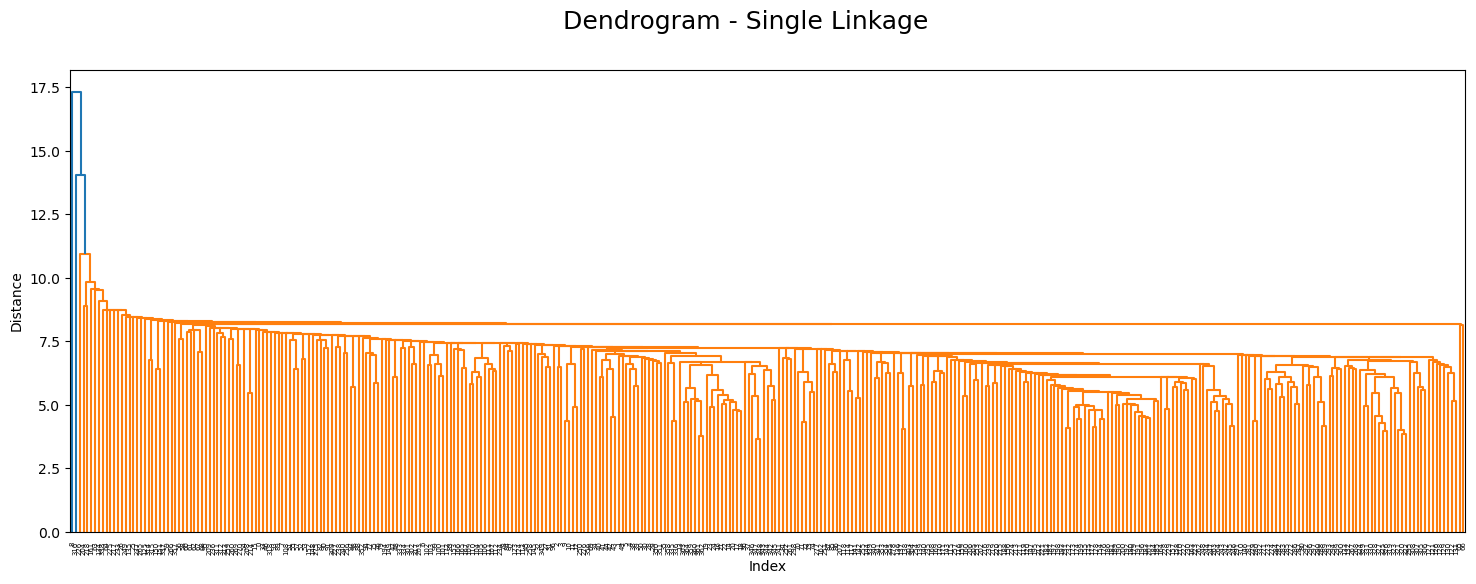

In [6]:
# Create linkage matrix using the 'single' method
# Comparing reduced data in 2010
distance_single = linkage(reduced.loc[:,
['PCA1',
'PCA2',
'PCA3',
'PCA4',
'PCA5',
'PCA6',
'PCA7',
'PCA8',
'PCA9',
'PCA10',
'PCA11',
'PCA12',
'PCA13',
'PCA14',
'PCA15',
'PCA16',
'PCA17',
'PCA18',
'PCA19',
'PCA20',
'PCA21',
'PCA22',
'PCA23',
'PCA24',
'PCA25',
'PCA26',
'PCA27',
'PCA28',
'PCA29',
'PCA30']],method="single")


# Plot the dendrogram
plt.figure(figsize=(18,6))
dendrogram(distance_single, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram - Single Linkage",fontsize=18)
plt.show()

In [7]:
# Count the number of clusters
for threshold in [10, 5, 2, 1]:
    clusters = fcluster(distance_single, t=threshold, criterion='distance')
    print(f"Threshold = {threshold}, Number of clusters = {len(set(clusters))}")

Threshold = 10, Number of clusters = 4
Threshold = 5, Number of clusters = 328
Threshold = 2, Number of clusters = 365
Threshold = 1, Number of clusters = 365


#### **Complete Linkage**

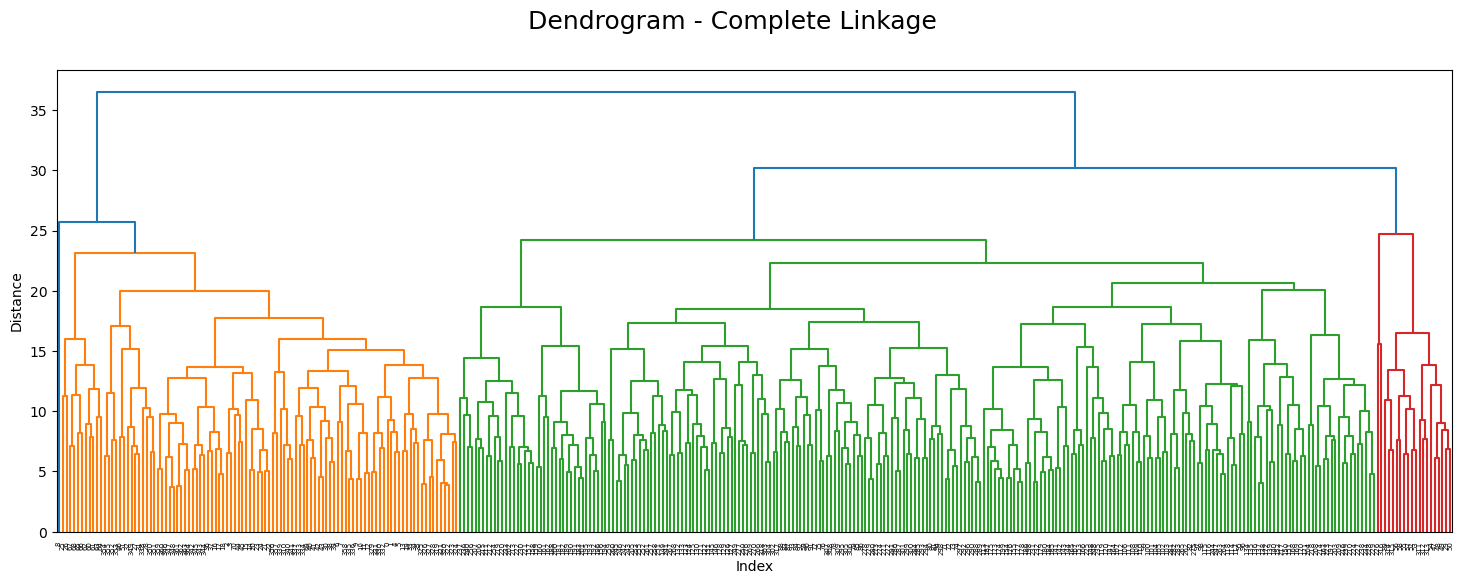

In [8]:
# Create linkage matrix using the 'complete' method
# Comparing reduced data in 2010
distance_complete = linkage(reduced.loc[:,
['PCA1',
'PCA2',
'PCA3',
'PCA4',
'PCA5',
'PCA6',
'PCA7',
'PCA8',
'PCA9',
'PCA10',
'PCA11',
'PCA12',
'PCA13',
'PCA14',
'PCA15',
'PCA16',
'PCA17',
'PCA18',
'PCA19',
'PCA20',
'PCA21',
'PCA22',
'PCA23',
'PCA24',
'PCA25',
'PCA26',
'PCA27',
'PCA28',
'PCA29',
'PCA30']],method="complete")


# Plot the dendrogram
plt.figure(figsize=(18,6))
dendrogram(distance_complete, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram - Complete Linkage",fontsize=18)
plt.show()

In [9]:
# Count the number of clusters
for threshold in [10, 5, 2, 1]:
    clusters = fcluster(distance_complete, t=threshold, criterion='distance')
    print(f"Threshold = {threshold}, Number of clusters = {len(set(clusters))}")

Threshold = 10, Number of clusters = 117
Threshold = 5, Number of clusters = 338
Threshold = 2, Number of clusters = 365
Threshold = 1, Number of clusters = 365


### **Average Linkage**

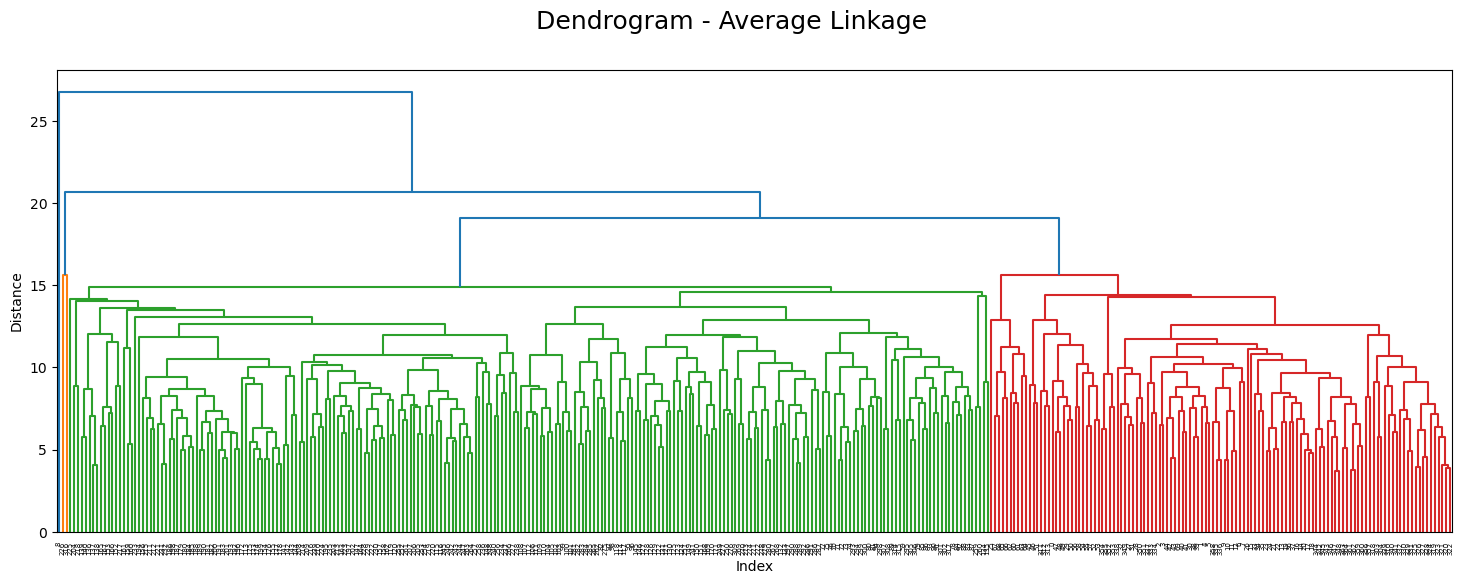

In [10]:
# Create linkage matrix using the 'average' method
# Comparing reduced data in 2010
distance_average = linkage(reduced.loc[:,
['PCA1',
'PCA2',
'PCA3',
'PCA4',
'PCA5',
'PCA6',
'PCA7',
'PCA8',
'PCA9',
'PCA10',
'PCA11',
'PCA12',
'PCA13',
'PCA14',
'PCA15',
'PCA16',
'PCA17',
'PCA18',
'PCA19',
'PCA20',
'PCA21',
'PCA22',
'PCA23',
'PCA24',
'PCA25',
'PCA26',
'PCA27',
'PCA28',
'PCA29',
'PCA30']],method="average")


# Plot the dendrogram
plt.figure(figsize=(18,6))
dendrogram(distance_average, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram - Average Linkage",fontsize=18)
plt.show()

In [11]:
# Count the number of clusters
for threshold in [10, 5, 2, 1]:
    clusters = fcluster(distance_average, t=threshold, criterion='distance')
    print(f"Threshold = {threshold}, Number of clusters = {len(set(clusters))}")

Threshold = 10, Number of clusters = 69
Threshold = 5, Number of clusters = 336
Threshold = 2, Number of clusters = 365
Threshold = 1, Number of clusters = 365


### **Ward Method**

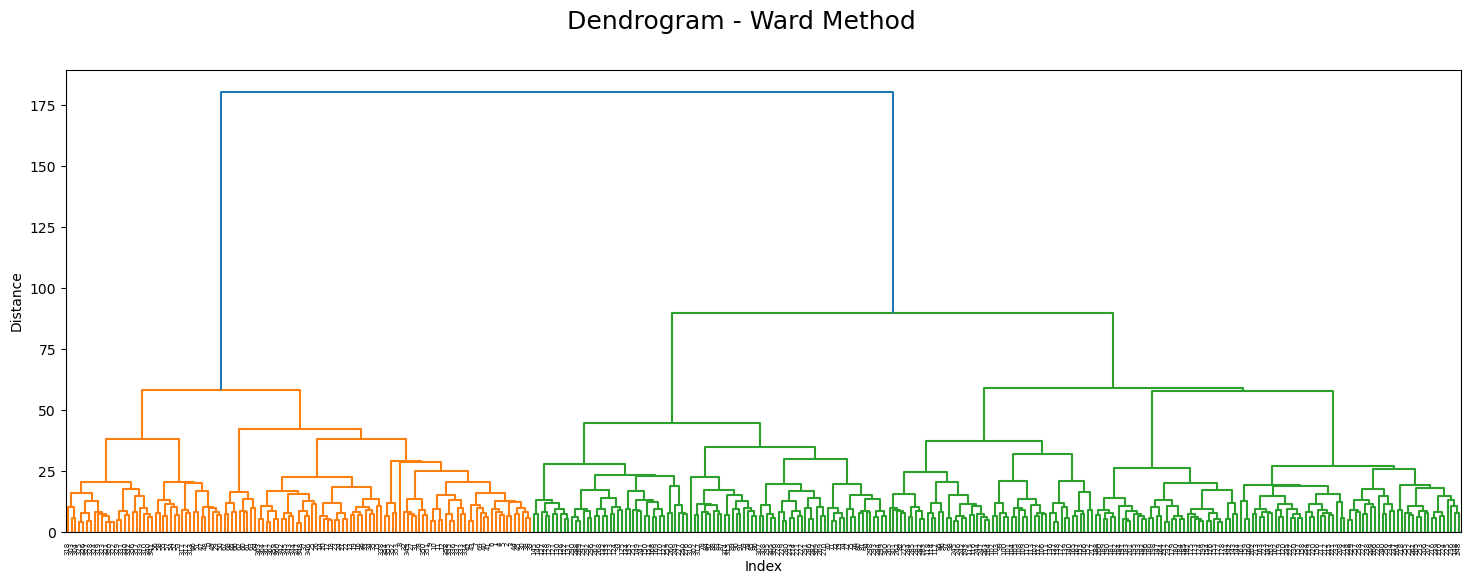

In [12]:
# Create linkage matrix using the 'ward' method
# Comparing reduced data in 2010
distance_ward = linkage(reduced.loc[:,
['PCA1',
'PCA2',
'PCA3',
'PCA4',
'PCA5',
'PCA6',
'PCA7',
'PCA8',
'PCA9',
'PCA10',
'PCA11',
'PCA12',
'PCA13',
'PCA14',
'PCA15',
'PCA16',
'PCA17',
'PCA18',
'PCA19',
'PCA20',
'PCA21',
'PCA22',
'PCA23',
'PCA24',
'PCA25',
'PCA26',
'PCA27',
'PCA28',
'PCA29',
'PCA30']],method="ward")


# Plot the dendrogram
plt.figure(figsize=(18,6))
dendrogram(distance_ward, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram - Ward Method",fontsize=18)
plt.show()

In [13]:
# Count the number of clusters
for threshold in [10, 5, 2, 1]:
    clusters = fcluster(distance_ward, t=threshold, criterion='distance')
    print(f"Threshold = {threshold}, Number of clusters = {len(set(clusters))}")

Threshold = 10, Number of clusters = 123
Threshold = 5, Number of clusters = 338
Threshold = 2, Number of clusters = 365
Threshold = 1, Number of clusters = 365
